## Perform Classification using K Nearest Neightbour (KNN)


In [ ]:
#1. Import Data
#2. Data EDA
#3. Data preprocessing
#4. Data splitting
#5. Feature Scaling
#6. Model Development
#7. Model Evaluation


In [2]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  datasets, model_selection, linear_model, metrics, preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [9]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
df = data.frame
df.info()
# df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
dir(data)
# dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


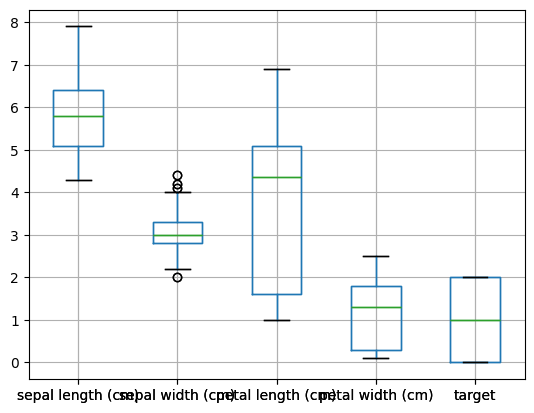

In [14]:
df.boxplot()
plt.show()

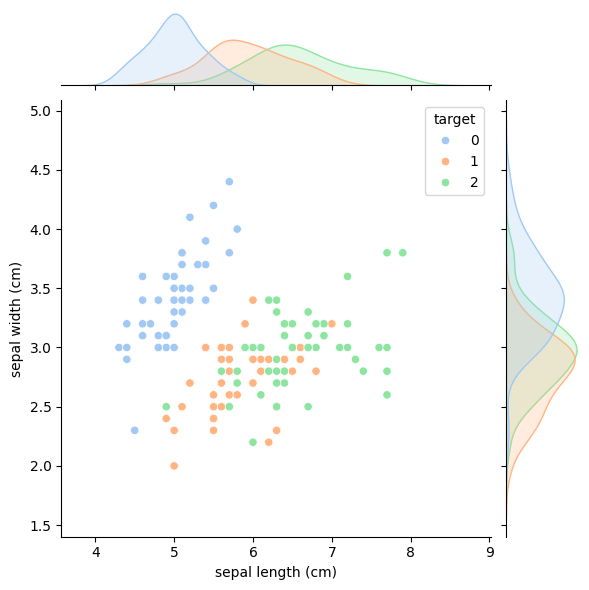

In [18]:
# Data visualisation
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, hue='target', palette='pastel')
plt.show()

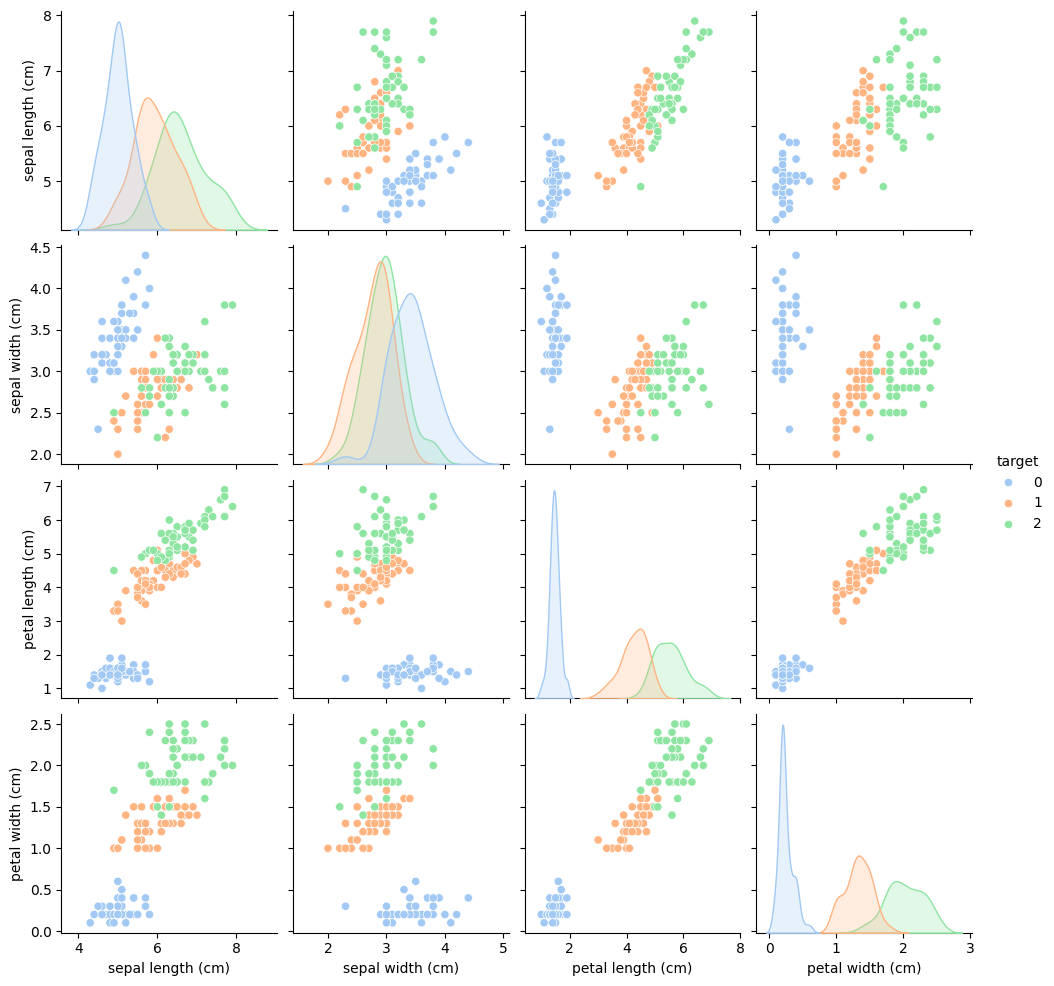

In [19]:
sns.pairplot(df, hue='target', palette="pastel")
plt.show()

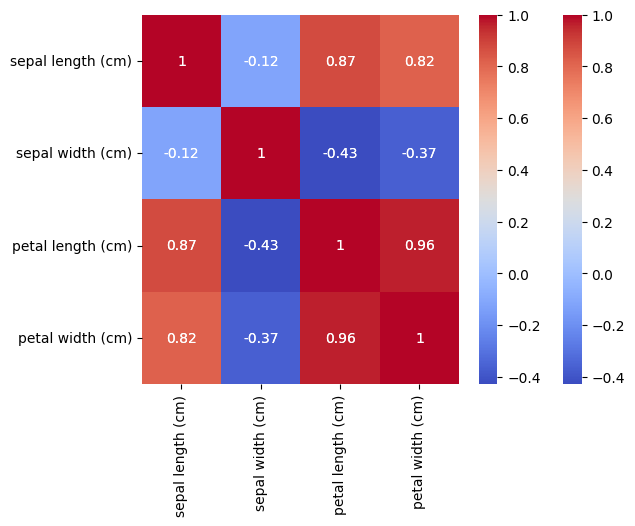

In [21]:
# find correlation betwwin featurs
df_cr = df.drop('target', axis=1)

corr = df_cr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
# Data preprocessing
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(1)

In [25]:
df = df.drop_duplicates() # remove duplicate

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [29]:
# Train test split
features = df.drop('target', axis=1)
target = df['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.3, random_state=42)

In [42]:
# Model Development

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
test_predictions = knn.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, test_predictions)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


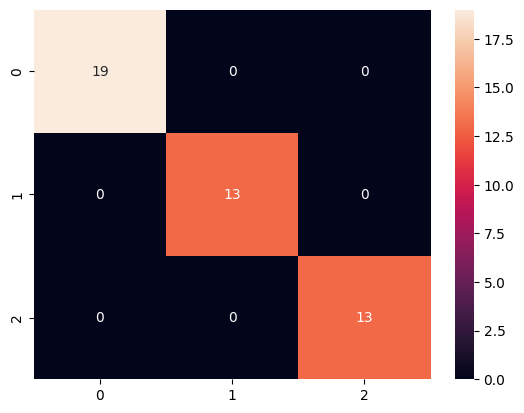

In [45]:
sns.heatmap(cm, annot=True)
plt.show()

In [46]:
from sklearn.metrics import classification_report


print("Report for thest prediction:", classification_report(y_test, test_predictions))

Report for thest prediction:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[31  0  0]
 [ 0 33  4]
 [ 0  3 33]]


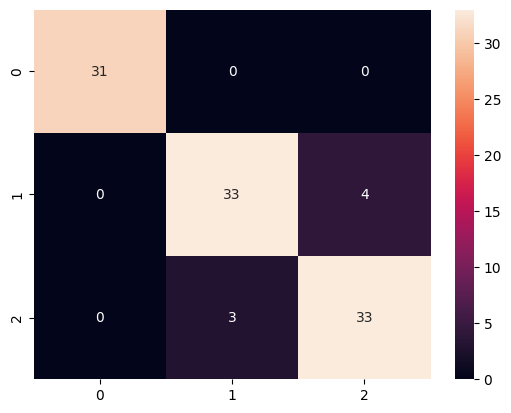

In [47]:
train_predictions = knn.predict(x_train)
cm = confusion_matrix(y_train, train_predictions)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [54]:
test = pd.DataFrame([[6.8, 2.8, 4.8, 1.4]])
test.columns = x_test.columns
y = knn.predict(test)
print(y)

[1]
